In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# Load Data
df = pd.read_csv("../data/Employee_Salary_Dataset.csv")

In [3]:
# Remove outliers in Salary using IQR
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df['Salary'] >= lower) & (df['Salary'] <= upper)].copy()

In [4]:
# Encode Gender label as 0/1
df['Gender'] = LabelEncoder().fit_transform(df['Gender']) # Male=1, Female=0

In [5]:
# Prepare input/output
X = df[['Experience_Years', 'Age', 'Gender']].values
y = df['Salary'].values

In [6]:
# Transform input features for polynomial regression (degree=2 is common)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [7]:
# Split for training/testing
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [8]:
# Train polynomial regression model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
# Predictions and evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"R^2: {r2}")

MAE: 12322.275374710824
R^2: 0.9982038387884203


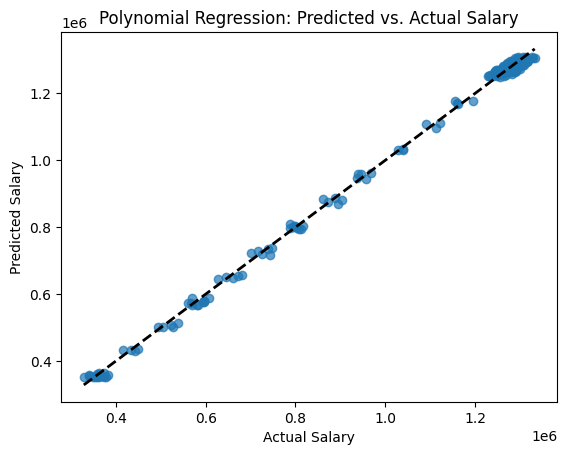

In [10]:
# Plot predicted vs actual salaries
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Polynomial Regression: Predicted vs. Actual Salary")
plt.show()